In [145]:
# import the packages
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  #for the statistical tests
%matplotlib inline

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
# Getting the data
claims = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 3 - Insurance Claims Case Study/Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demo = pd.read_csv('C:/Users/Vaibhav Dewat/Downloads/Analytix Lab course/Case Study/Python Foundation Case Study 3 - Insurance Claims Case Study/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')


In [6]:
claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


In [5]:
cust_demo.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [48]:
claims_main = pd.merge(left = cust_demo, right = claims, how = 'right', right_on = 'customer_id', left_on = 'CUST_ID')
claims_main.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [82]:
claims_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1078 non-null   float64       
 1   gender               1078 non-null   object        
 2   DateOfBirth          1078 non-null   datetime64[ns]
 3   State                1078 non-null   object        
 4   Contact              1078 non-null   object        
 5   Segment              1078 non-null   object        
 6   claim_id             1078 non-null   int64         
 7   customer_id          1078 non-null   int64         
 8   incident_cause       1078 non-null   object        
 9   claim_date           1078 non-null   object        
 10  claim_area           1078 non-null   object        
 11  police_report        1078 non-null   object        
 12  claim_type           1078 non-null   object        
 13  claim_amount         1078 non-nul

In [53]:
claims_main['C_date'] = claims_main.claim_date.apply(lambda x: dt.datetime.strptime(x,"%m/%d/%Y"))
claims_main["DateOfBirth"] = pd.to_datetime(claims_main.DateOfBirth, format = "%d-%b-%y")
claims_main.loc[(claims_main.DateOfBirth.dt.year > 2020),"DateOfBirth"] = claims_main[claims_main.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years = 100))

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [56]:
claims_main.claim_amount.fillna('0', inplace = True)
claims_main['claim_amount'] = claims_main['claim_amount'].apply(lambda x: x.replace('$', '')).astype(np.float64)

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [59]:
claims_main['unreported_claims']= np.where(claims_main.police_report == 'Unknown',1,0)
claims_main

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,C_date,unreported_claims
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017-11-27,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018-10-03,1
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2018-02-02,0
3,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2018-06-17,0
4,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,2018-01-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,NaN,NaN,NaT,NaN,NaN,NaN,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,3059.0,4.0,Yes,2017-06-11,0
1096,NaN,NaN,NaT,NaN,NaN,NaN,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,1520.0,2.0,No,2018-03-14,0
1097,NaN,NaN,NaT,NaN,NaN,NaN,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,23575.0,2.0,Yes,2018-02-09,0
1098,NaN,NaN,NaT,NaN,NaN,NaN,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,25120.0,1.0,No,2018-03-21,1


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

##### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [61]:
claims_main = claims_main.drop_duplicates(subset = "customer_id", keep = "last")
claims_main

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,C_date,unreported_claims
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017-11-27,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018-10-03,1
6,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No,2018-01-13,0
7,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,27026412,73486606,Natural causes,04/10/2018,Auto,No,Material only,1160.0,3.0,No,2018-04-10,0
8,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,43908336,32813689,Crime,02/15/2018,Auto,Unknown,Material only,2620.0,1.0,No,2018-02-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,NaN,NaN,NaT,NaN,NaN,NaN,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,3059.0,4.0,Yes,2017-06-11,0
1096,NaN,NaN,NaT,NaN,NaN,NaN,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,1520.0,2.0,No,2018-03-14,0
1097,NaN,NaN,NaT,NaN,NaN,NaN,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,23575.0,2.0,Yes,2018-02-09,0
1098,NaN,NaN,NaT,NaN,NaN,NaN,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,25120.0,1.0,No,2018-03-21,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [68]:
claims_main.loc[claims_main['claim_amount'] == 0, 'claim_amount'] = claims_main['claim_amount'].mean()

In [73]:
claims_main["total_policy_claims"] = claims_main['total_policy_claims'].fillna(claims_main['total_policy_claims'].mode()[0])
claims_main["total_policy_claims"]= claims_main["total_policy_claims"].astype(str)

In [81]:
claims_main.dropna(subset = 'CUST_ID', inplace = True)

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60


In [84]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(claims_main['DateOfBirth']).year         
x = dob_year - 100                                               
v = curr_year - x
y = curr_year - dob_year
claims_main['age'] = (np.where(dob_year > curr_year,v,y))
claims_main.loc[(claims_main.age < 18),'AgeGroup'] = 'Children'
claims_main.loc[(claims_main.age >=18) & (claims_main.age <30),'AgeGroup'] = 'Youth'
claims_main.loc[(claims_main.age >=30) & (claims_main.age <60),'AgeGroup'] = 'Adult'
claims_main.loc[(claims_main.age >=60),'AgeGroup'] = 'Senior'
claims_main

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,C_date,unreported_claims,age,AgeGroup
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2017-11-27,0,44,Adult
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,2018-10-03,1,53,Adult
6,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No,2018-01-13,0,24,Youth
7,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,27026412,73486606,Natural causes,04/10/2018,Auto,No,Material only,1160.0,3.0,No,2018-04-10,0,24,Youth
8,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,43908336,32813689,Crime,02/15/2018,Auto,Unknown,Material only,2620.0,1.0,No,2018-02-15,1,30,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2018-09-06,0,42,Adult
1081,42364152.0,Female,1996-07-07,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2017-05-09,0,27,Youth
1082,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2017-05-15,0,33,Adult
1083,11256802.0,Female,1964-10-22,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2017-04-18,0,59,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [86]:
claims_main.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12800.837309
Platinum,12339.728674
Silver,12204.986596


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [88]:
A = claims_main[claims_main['C_date'] < '2018-09-11']
A.groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.180969e+05
Driver error,3.306630e+06
Natural causes,1.305832e+06
Other causes,3.708553e+06
Other driver error,3.267548e+06


In [89]:
# Total claim amount

A.groupby('incident_cause')[['claim_amount']].sum().sum()

claim_amount    1.230666e+07
dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [97]:
B = claims_main[claims_main['State'].isin(['TX', 'DE', 'AK'])]
B = B[B['incident_cause'].str.contains("river")]
B.AgeGroup.value_counts()

# 27 Adults from TX, DE and AK claimed insurance for driver related issues and causes

Adult     27
Youth      5
Senior     3
Name: AgeGroup, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


array([<AxesSubplot:ylabel='Gold'>, <AxesSubplot:ylabel='Platinum'>,
       <AxesSubplot:ylabel='Silver'>], dtype=object)

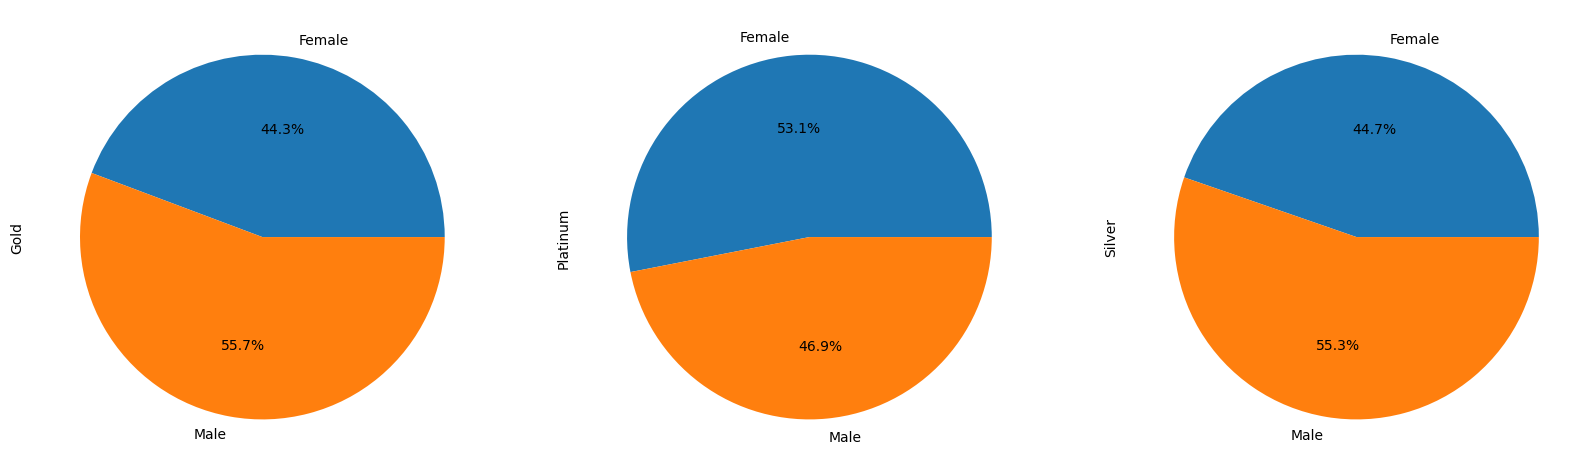

In [107]:
Claim_GS = round(claims_main.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
Claim_GSP= Claim_GS.pivot(index = "Segment", columns = "gender", values = "claim_amount")
Claim_GSP.T.plot(kind = "pie", subplots = True, legend = False, figsize = (20,10), autopct = '%1.1f%%')


### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

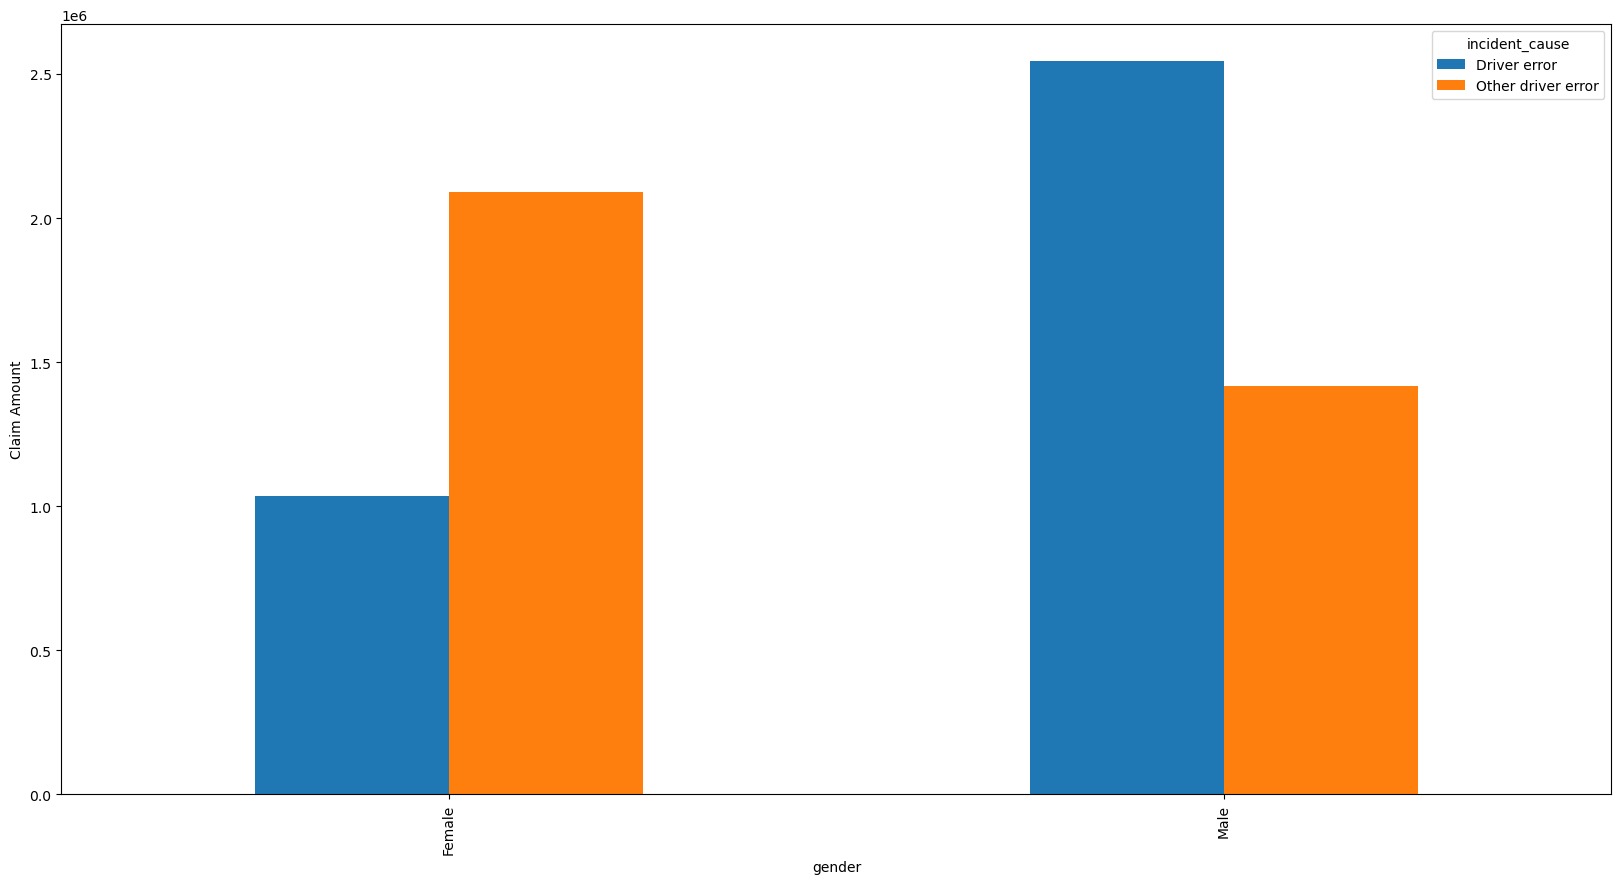

In [116]:
D = claims_main[claims_main['incident_cause'].str.contains("river")]
D = pd.crosstab(index = D.gender, columns = D.incident_cause, values = D.claim_amount, aggfunc = sum)
D.plot(kind = "bar", figsize = (20,10))
plt.ylabel('Claim Amount')
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


[]

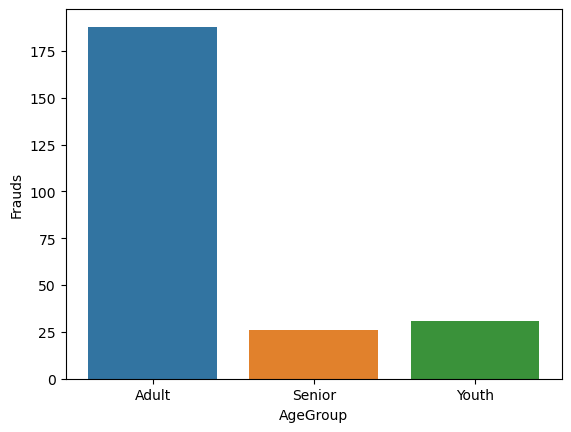

In [121]:
claims_main["Frauds"]= np.where(claims_main.fraudulent == "Yes",1,0)
AG_frauds= claims_main.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
sns.barplot(x = "AgeGroup", y = "Frauds", data = AG_frauds )
plt.plot()


### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

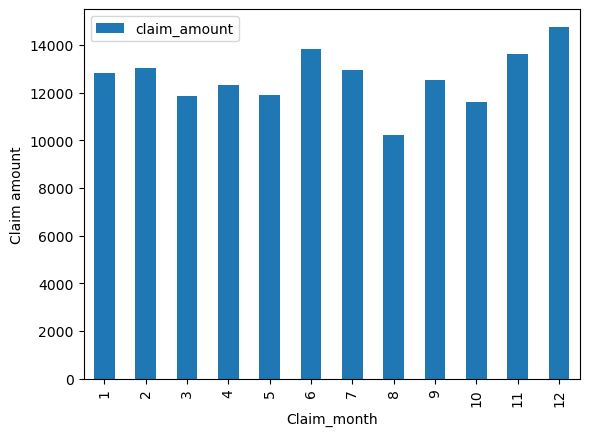

In [134]:
claims_main['claim_month'] = pd.to_datetime(claims_main['C_date'])
claims_main['Claim_month'] = claims_main['claim_month'].dt.month
pd.pivot_table(claims_main,index = 'Claim_month',values = 'claim_amount').plot(kind = 'bar')
plt.ylabel('Claim amount')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


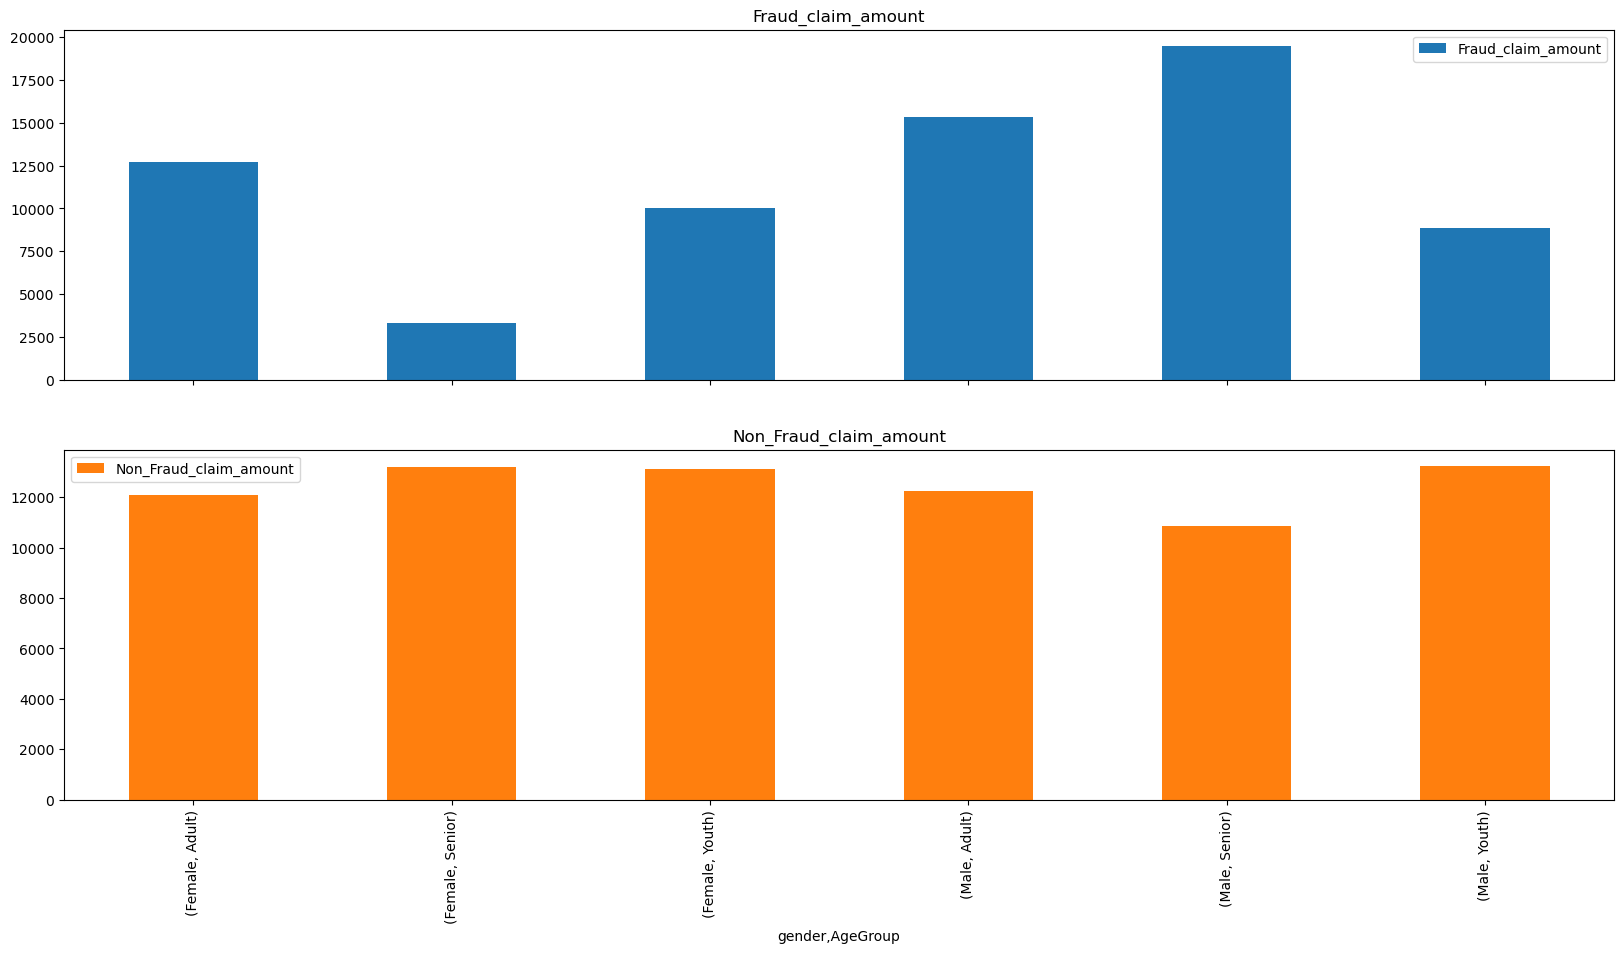

In [144]:
Frauds_AG = pd.DataFrame(claims_main.loc[(claims_main.fraudulent == 'Yes')].groupby(['gender','AgeGroup'])[['claim_amount']].mean().add_prefix('Fraud_'))
NFrauds_AG = pd.DataFrame(claims_main.loc[(claims_main.fraudulent == 'No')].groupby(['gender','AgeGroup'])[['claim_amount']].mean().add_prefix('Non_Fraud_'))
Claims_AG = pd.merge(Frauds_AG,NFrauds_AG, on = ['gender','AgeGroup'])
Claims_AG.plot(kind = 'bar', subplots = True, legend = True, figsize = (20,10))
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

### 16. Is there any similarity in the amount claimed by males and females?

In [149]:
claim_M = claims_main['claim_amount'].loc[claims_main['gender'] == 'Male']
claim_F = claims_main['claim_amount'].loc[claims_main['gender'] == 'Female']

In [150]:
# Ho: u1 = u2
# Ha: u1 <> u2
# CI: 99%, p: 0.01

# perform the test
stats.ttest_ind( claim_M, claim_F)

# stats conclusion
# with the given sample we fail to reject the H0
# Hence, the amount claimed by males and females are similar

Ttest_indResult(statistic=0.9532316561004966, pvalue=0.3406867944785106)

### 17. Is there any relationship between age category and segment?

In [160]:
age_CS = pd.crosstab(claims_main.AgeGroup, claims_main.Segment)
age_CS

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,277,268,257
Senior,38,34,30
Youth,56,59,59


In [159]:
# Ho: No relation between category and segment
# Ha: Associated
# CI: 99%, p: 0.01

# perform the test
stats.chi2_contingency(age_CS)

# stats conclusion
# with the given sample we fail to reject the H0
# Hence, there is NO relation between category and segment

(0.9130129732295923,
 0.9226865183013125,
 4,
 array([[276.01298701, 268.57328386, 257.41372913],
        [ 35.1038961 ,  34.15769944,  32.73840445],
        [ 59.88311688,  58.2690167 ,  55.84786642]]))

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [165]:
claims_main["Year"]= claims_main['C_date'].dt.year
Cur_year = claims_main.loc[claims_main.Year == 2018]['claim_amount']
Past_year = claims_main.loc[claims_main.Year <= 2017]['claim_amount']

In [168]:
# Ho: u1 <= u2
# Ha: u1 > u2
# CI: 95%, p: 0.05

# perform the test
stats.ttest_ind( Cur_year, Past_year)

# stats conclusion
# with the given sample we fail to reject the H0
# Hence, the claim amounts for current year are similar to claim amounts of 2016-17

Ttest_indResult(statistic=0.5700888374689896, pvalue=0.5687364566089615)

### 19. Is there any difference between age groups and insurance claims?

In [174]:
A = claims_main.loc[claims_main.AgeGroup == 'Adult']['claim_amount']
B = claims_main.loc[claims_main.AgeGroup == 'Youth']['claim_amount']
C = claims_main.loc[claims_main.AgeGroup == 'Senior']['claim_amount']

In [175]:
# Ho: means are EQUAL
# Ha: means are UNEQUAL
# CI: 95%, p: 0.05

# perform the test
stats.f_oneway( A, B, C)

# stats conclusion
# with the given sample we fail to reject the H0
# Hence, the amount claimed by Adults, Youths and Seniors are similar

F_onewayResult(statistic=0.5703745494687846, pvalue=0.5654846468380608)

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [212]:
claims_main['total_policy_claims'] = pd.to_numeric(claims_main['total_policy_claims'])
claims_main.total_policy_claims.fillna(0, inplace = True)
claims_main.claim_amount.fillna(0, inplace = True)

In [213]:
claims_main.total_policy_claims.corr(other = claims_main.claim_amount)

-0.02103144961971927

In [215]:
# Ho: No relation between policy claims and claimed amount
# Ha: Associated
# CI: 95%, p: 0.05

# perform the test
stats.pearsonr( claims_main.total_policy_claims, claims_main.claim_amount )

# Conclusion :
# P-value is high and correlation value is low
# There is no relation between policy claims and claimed amount

PearsonRResult(statistic=-0.021031449619719318, pvalue=0.4901190546793647)

# THE END